In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from PIL import Image

import hopfield
import utilities as uti
import learning_rules as lrn
import activation_functions as afn
from datasets import Dataset_demoletters, Dataset_MNIST, Dataset_Demyan, Dataset_whitenoise

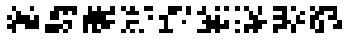

In [2]:
# Generate white noise samples

np.random.seed(42)
alphabet_len = 9
img_pixels = 40
white_noise_dataset = Dataset_whitenoise(alphabet_len = alphabet_len, image_pixels = img_pixels).get_data()

for i in range(alphabet_len):
    ax = plt.subplot(1, alphabet_len, i + 1)
    uti.show_letter(white_noise_dataset[i], ax)


The number of memory patterns to be stored is > 14%% of the model size. This may lead to problems.ref: https://doi.org/10.3389/fncom.2016.00144


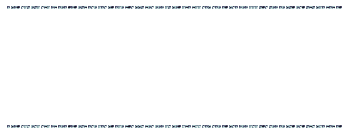

In [3]:
hop_net = hopfield.HopfieldNetwork()
pm = hop_net.run(white_noise_dataset, iterations=1000, lr="hebbian",af="async_tanh", need_plot = True)
# print(pm)

# 1.experiments: same side_len, accuracy, mean error

In [5]:
result_records = []
error_result = {}
for pixels in range(4, 100, 4):
    for alphabet_len in range(4, 40):
        white_noise_dataset = Dataset_whitenoise(alphabet_len = alphabet_len, image_pixels = pixels).get_data()
        hop_net = hopfield.HopfieldNetwork()
        pm = hop_net.run(white_noise_dataset, iterations=1000, lr="hebbian",af="async_tanh")
        print(pixels, alphabet_len, np.mean(pm.is_correct))
        record = {
            'pixels':pixels,
            'alphabet_len':alphabet_len,
            'accuracy':np.mean(pm.is_correct),
            'mean error':np.mean(pm.error),
            'mean timestamp':np.mean(pm.timestamp),
            'mean energy':np.mean(pm.process_energy)
        }
        result_records.append(record)
        # accuracy_result[(pixels, alphabet_len)] = 
        # error_result[(pixels, alphabet_len)] = np.mean(pm.timestamp)

The number of memory patterns to be stored is > 14%% of the model size. This may lead to problems.ref: https://doi.org/10.3389/fncom.2016.00144
4 4 0.47
The number of memory patterns to be stored is > 14%% of the model size. This may lead to problems.ref: https://doi.org/10.3389/fncom.2016.00144
4 5 0.37
The number of memory patterns to be stored is > 14%% of the model size. This may lead to problems.ref: https://doi.org/10.3389/fncom.2016.00144
4 6 0.26
The number of memory patterns to be stored is > 14%% of the model size. This may lead to problems.ref: https://doi.org/10.3389/fncom.2016.00144
4 7 0.32
The number of memory patterns to be stored is > 14%% of the model size. This may lead to problems.ref: https://doi.org/10.3389/fncom.2016.00144
4 8 0.24
The number of memory patterns to be stored is > 14%% of the model size. This may lead to problems.ref: https://doi.org/10.3389/fncom.2016.00144
4 9 0.18
The number of memory patterns to be stored is > 14%% of the model size. This may l

In [6]:
df = pd.DataFrame.from_records(result_records)
df.head()
df.to_csv("Result_accuracy.csv")

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))

for side_len in df['side_len'].unique():
    df_now = df[df['side_len'] == side_len]
    plt.plot(df_now['alphabet_len'], df_now['accuracy'], label = f'#neurons = {side_len * side_len}')
plt.xlabel("#Input_Images")
plt.ylabel("Accuracy")
plt.title("Accuracy v.s. #Neurons and #Input_Images")
plt.legend()

# energy_states = hop_net.sequence_energy("se_lin")
# energy_states = energy_states[:40]

# # ax energy accuracy
# ax_energy_time = axs
# ax_energy_time.scatter(range(len(energy_states)), energy_states)
# ax_energy_time.set_xlabel("Mean energy")
# ax_energy_time.set_ylabel("Mean Timestamp")
# ax_energy_time.set_title("Mean energy v.s. Mean Timestamp")

Text(0.5, 1.0, 'Time v.s. Energy')

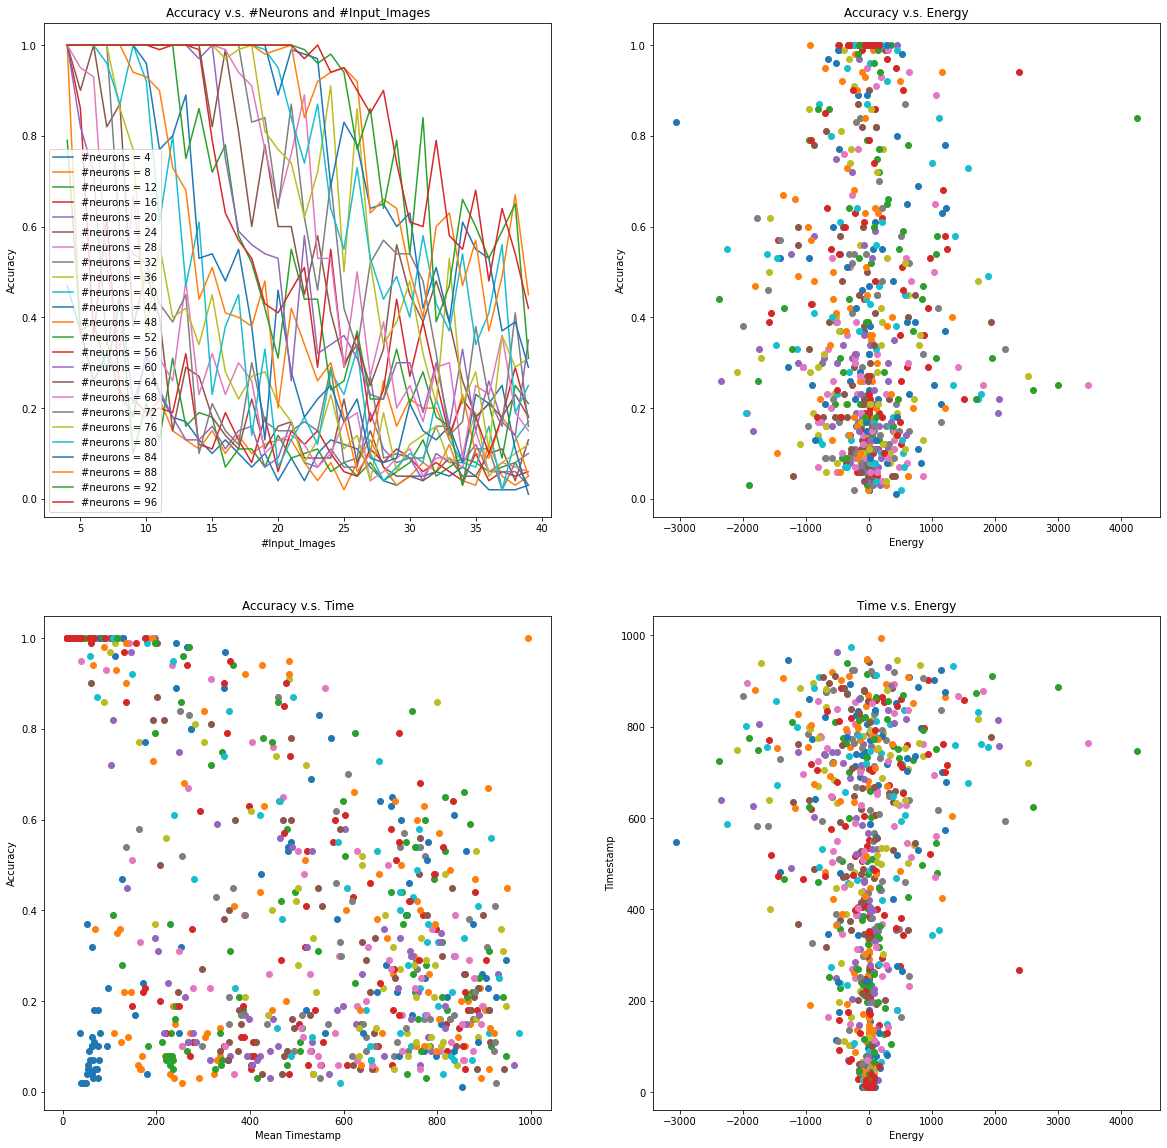

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
ax_acc = axs[0][0]
ax_energy = axs[0][1]
ax_time = axs[1][0]
ax_energy_vs_time = axs[1][1]

for pixels in df['pixels'].unique():
    df_now = df[df['pixels'] == pixels]
    ax_acc.plot(df_now['alphabet_len'], df_now['accuracy'], label = f'#neurons = {pixels}')
    ax_time.scatter(df_now['mean timestamp'], df_now["accuracy"])
    ax_energy.scatter(df_now['mean energy'], df_now['accuracy'])
    ax_energy_vs_time.scatter(df_now['mean energy'], df_now['mean timestamp'])

ax_acc.set_xlabel("#Input_Images")
ax_acc.set_ylabel("Accuracy")
ax_acc.set_title("Accuracy v.s. #Neurons and #Input_Images")
ax_acc.legend()

ax_energy.set_xlabel("Energy")
ax_energy.set_ylabel("Accuracy")
ax_energy.set_title("Accuracy v.s. Energy")

ax_time.set_xlabel("Mean Timestamp")
ax_time.set_ylabel("Accuracy")
ax_time.set_title("Accuracy v.s. Time")

ax_energy_vs_time.set_xlabel("Energy")
ax_energy_vs_time.set_ylabel("Timestamp")
ax_energy_vs_time.set_title("Time v.s. Energy")

# 2 Change the threshold of tanh

The number of memory patterns to be stored is > 14%% of the model size. This may lead to problems.ref: https://doi.org/10.3389/fncom.2016.00144


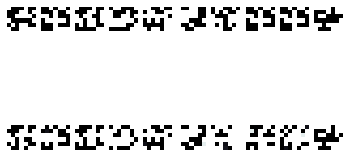

In [5]:
img_pixels = 40
alphabet_len = 16
white_noise_dataset = Dataset_whitenoise(alphabet_len = alphabet_len, image_pixels = img_pixels).get_data()

hop_net = hopfield.HopfieldNetwork()
pm = hop_net.run(white_noise_dataset, iterations=1000, lr="hebbian",af="async_tanh", 
        n_test_samples = 10, af_gradient = 10, af_threshold = 2,need_plot = True)
# print(pm)

# 3. Change the noise level

In [6]:
img_pixels = 40
alphabet_len = 16
white_noise_dataset = Dataset_whitenoise(alphabet_len = alphabet_len, image_pixels = img_pixels).get_data()

hop_net = hopfield.HopfieldNetwork()
pm = hop_net.run(white_noise_dataset, iterations=1000, lr="hebbian",af="async_tanh", noise_level = .25,
        n_test_samples = 10,need_plot = True)
# print(pm)

SyntaxError: invalid syntax (Temp/ipykernel_32524/715744295.py, line 7)

In [ ]:
# pms = [pm]
# neurons = [28 * 28]
# fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# # 1
# ax_num_acc = axs[0][0]
# ax_num_acc.plot(neurons, [np.mean(pm.is_correct) for pm in pms])
# ax_num_acc.set_xlabel('#Neurons')
# ax_num_acc.set_ylabel("Accuracy")
# ax_num_acc.set_xticks(neurons)
# ax_num_acc.set_title(f"#Neuron v.s. Accuracy (#trial = {n_test_samples}, #input_sample={ninput})")


# # ax timestep accuracy
# ax_time_acc = axs[0][1]
# ax_time_acc.scatter([np.mean(pm.time) for pm in pms], [np.mean(pm.is_correct) for pm in pms])
# ax_time_acc.set_xlabel(f"Mean timestamp on {n_test_samples} trials")
# ax_time_acc.set_ylabel("Accuracy")
# ax_time_acc.set_title("Mean timestamp v.s. Accuracy")

# # ax energy accuracy
# ax_energy_acc = axs[1][0]
# ax_energy_acc.scatter([np.mean(pm.energy) for pm in pms], [np.mean(pm.is_correct) for pm in pms])
# ax_energy_acc.set_xlabel(f"Mean energy on {n_test_samples} trials")
# ax_energy_acc.set_ylabel("Accuracy")
# ax_energy_acc.set_title("Mean energy v.s. Accuracy")

# # ax energy accuracy
# ax_energy_time = axs[1][1]
# ax_energy_time.scatter([np.mean(pm.energy) for pm in pms], [np.mean(pm.time) for pm in pms])
# ax_energy_time.set_xlabel("Mean energy")
# ax_energy_time.set_ylabel("Mean Timestamp")
# ax_energy_time.set_title("Mean energy v.s. Mean Timestamp")
